In [19]:
import pandas as pd

df = pd.read_csv('sentiment140_cleaned.csv')
df.head()


,target,id,date,flag,user,text,cleaned_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot httptwitpiccom2y1zl awww thats bumm...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dived many times ball managed save 50...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving im mad cant see


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   target        1600000 non-null  int64 
 1   id            1600000 non-null  int64 
 2   date          1600000 non-null  object
 3   flag          1600000 non-null  object
 4   user          1600000 non-null  object
 5   text          1600000 non-null  object
 6   cleaned_text  1599678 non-null  object
dtypes: int64(2), object(5)
memory usage: 85.4+ MB


In [21]:
df.describe(include='all')

,target,id,date,flag,user,text,cleaned_text
count,1600000.0,1.600000e+06,1600000,1600000,1600000,1600000,1599678
unique,NaN,NaN,774363,1,659775,1581466,1554854
top,NaN,NaN,Mon Jun 15 12:53:14 PDT 2009,NO_QUERY,lost_dog,isPlayer Has Died! Sorry,work
freq,NaN,NaN,20,1600000,549,210,555
mean,0.5,1.998818e+09,NaN,NaN,NaN,NaN,NaN
std,0.5,1.935761e+08,NaN,NaN,NaN,NaN,NaN
min,0.0,1.467810e+09,NaN,NaN,NaN,NaN,NaN
25%,0.0,1.956916e+09,NaN,NaN,NaN,NaN,NaN
50%,0.5,2.002102e+09,NaN,NaN,NaN,NaN,NaN
75%,1.0,2.177059e+09,NaN,NaN,NaN,NaN,NaN


In [22]:
df.shape


(1600000, 7)

In [23]:
df.columns

Index(['target', 'id', 'date', 'flag', 'user', 'text', 'cleaned_text'], dtype='object')

In [24]:
df.isnull().sum()

target            0
id                0
date              0
flag              0
user              0
text              0
cleaned_text    322
dtype: int64

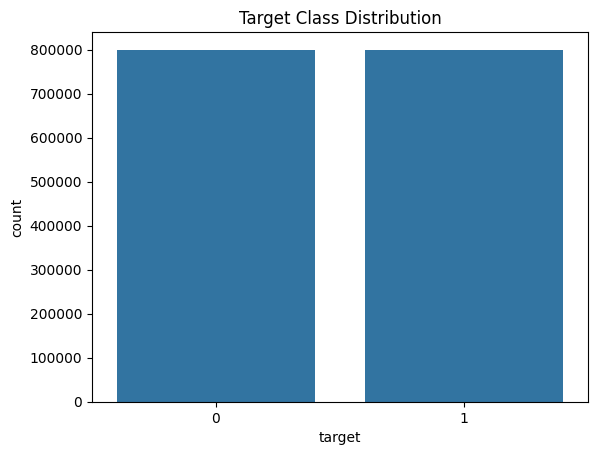

target
0    0.5
1    0.5
Name: proportion, dtype: float64

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=df)
plt.title("Target Class Distribution")
plt.show()

df['target'].value_counts(normalize=True)


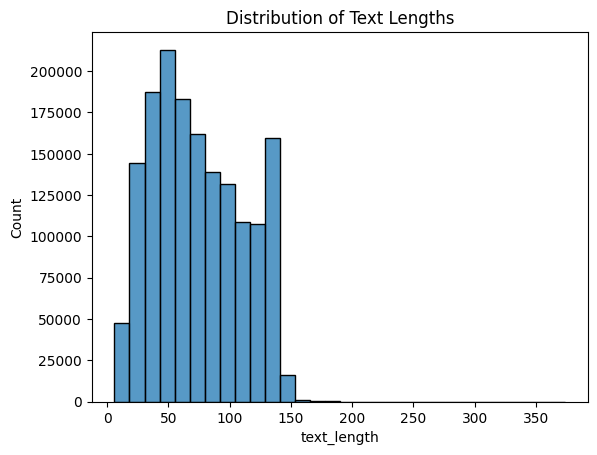

In [26]:
df['text_length'] = df['text'].apply(len)
sns.histplot(df['text_length'], bins=30)
plt.title("Distribution of Text Lengths")
plt.show()


In [27]:
for i in range(5):
    print(f"Text: {df['text'][i]}")
    print(f"Target: {df['target'][i]}")
    print('-'*60)


Text: @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
Target: 0
------------------------------------------------------------
Text: is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!
Target: 0
------------------------------------------------------------
Text: @Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds
Target: 0
------------------------------------------------------------
Text: my whole body feels itchy and like its on fire 
Target: 0
------------------------------------------------------------
Text: @nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. 
Target: 0
------------------------------------------------------------


In [28]:
df['has_url'] = df['text'].apply(lambda x: 1 if 'http' in x else 0)
print("Texts with URLs:", df['has_url'].sum())


Texts with URLs: 70183


In [29]:
import re
df['non_alpha'] = df['text'].apply(lambda x: len(re.findall(r'[^a-zA-Z ]', x)))
df['non_alpha'].describe()


count    1.600000e+06
mean     4.603210e+00
std      4.740117e+00
min      0.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      6.000000e+00
max      3.610000e+02
Name: non_alpha, dtype: float64

In [30]:
df.head()

,target,id,date,flag,user,text,cleaned_text,text_length,has_url,non_alpha
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot httptwitpiccom2y1zl awww thats bumm...,115,1,14
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...,111,0,6
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dived many times ball managed save 50...,89,0,5
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire,47,0,0
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving im mad cant see,111,0,9


In [31]:
import re
from collections import Counter

def simple_clean(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    return text.lower().split()

all_words = [word for text in df['text'] for word in simple_clean(text)]
Counter(all_words).most_common(20)


[('i', 960288),
 ('to', 566077),
 ('the', 525386),
 ('a', 385618),
 ('my', 317022),
 ('it', 305502),
 ('and', 303735),
 ('you', 302390),
 ('is', 238648),
 ('in', 217079),
 ('for', 216451),
 ('s', 192873),
 ('t', 185904),
 ('of', 184107),
 ('on', 168525),
 ('me', 166439),
 ('that', 166144),
 ('so', 154299),
 ('have', 145647),
 ('m', 140837)]

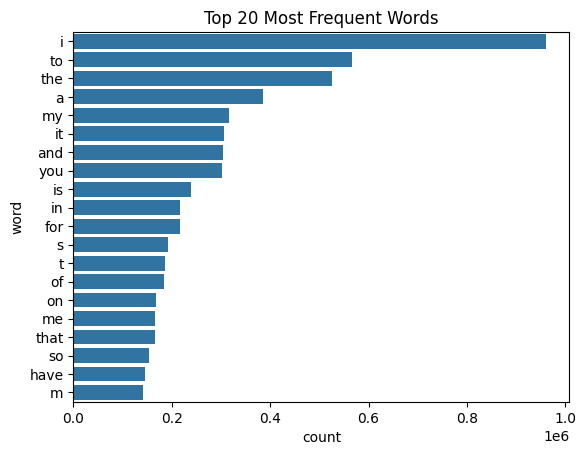

In [32]:
common_words = pd.DataFrame(Counter(all_words).most_common(20), columns=['word', 'count'])
sns.barplot(y='word', x='count', data=common_words)
plt.title("Top 20 Most Frequent Words")
plt.show()


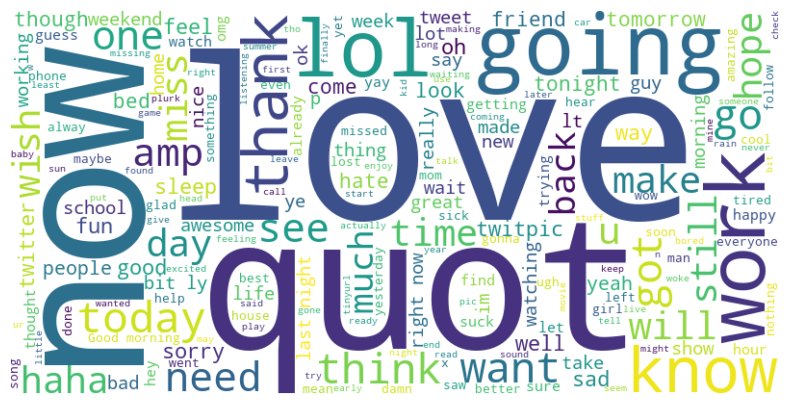

In [33]:
from wordcloud import WordCloud

text_all = " ".join(df['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_all)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [34]:
df.head()

,target,id,date,flag,user,text,cleaned_text,text_length,has_url,non_alpha
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot httptwitpiccom2y1zl awww thats bumm...,115,1,14
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...,111,0,6
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dived many times ball managed save 50...,89,0,5
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feels itchy like fire,47,0,0
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behaving im mad cant see,111,0,9
